<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0:
[[1 2 3]
 [4 0 5]
 [6 7 8]]

Step 1:
[[1 2 3]
 [4 5 0]
 [6 7 8]]

Step 2:
[[1 2 3]
 [4 5 8]
 [6 7 0]]

Step 3:
[[1 2 3]
 [4 5 8]
 [6 0 7]]

Step 4:
[[1 2 3]
 [4 5 8]
 [0 6 7]]

Step 5:
[[1 2 3]
 [0 5 8]
 [4 6 7]]

Step 6:
[[1 2 3]
 [5 0 8]
 [4 6 7]]

Step 7:
[[1 2 3]
 [5 6 8]
 [4 0 7]]

Step 8:
[[1 2 3]
 [5 6 8]
 [4 7 0]]

Step 9:
[[1 2 3]
 [5 6 0]
 [4 7 8]]

Step 10:
[[1 2 3]
 [5 0 6]
 [4 7 8]]

Step 11:
[[1 2 3]
 [0 5 6]
 [4 7 8]]

Step 12:
[[1 2 3]
 [4 5 6]
 [0 7 8]]

Step 13:
[[1 2 3]
 [4 5 6]
 [7 0 8]]

Step 14:
[[1 2 3]
 [4 5 6]
 [7 8 0]]



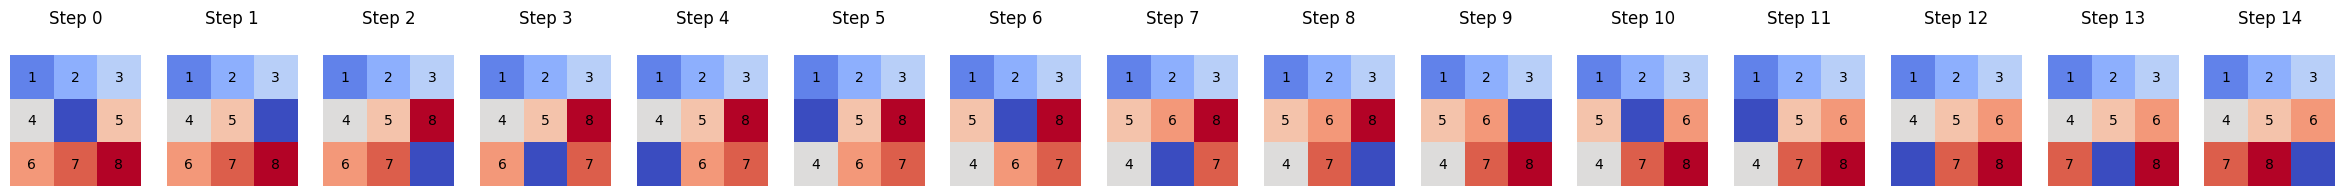

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

class PuzzleState:
    def __init__(self, board, parent=None, move=None, depth=0):
        self.board = board
        self.parent = parent
        self.move = move
        self.depth = depth
        self.priority = 0

    def __lt__(self, other):
        return self.priority < other.priority

    def get_possible_moves(self):
        moves = []
        zero_pos = np.argwhere(self.board == 0)[0]
        directions = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

        for move, (dx, dy) in directions.items():
            new_pos = zero_pos + np.array([dx, dy])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
                new_board = self.board.copy()
                new_board[zero_pos[0], zero_pos[1]], new_board[new_pos[0], new_pos[1]] = (
                    new_board[new_pos[0], new_pos[1]], new_board[zero_pos[0], zero_pos[1]])
                moves.append(PuzzleState(new_board, self, move, self.depth + 1))
        return moves

def heuristic_misplaced_tiles(state, goal):
    return np.sum(state.board != goal) - 1  # Ignore the blank tile

def a_star(start, goal, heuristic):
    open_list = []
    closed_set = set()
    heapq.heappush(open_list, (0, start))

    while open_list:
        _, current = heapq.heappop(open_list)
        if np.array_equal(current.board, goal):
            return current  # Goal reached
        closed_set.add(current.board.tobytes())

        for neighbor in current.get_possible_moves():
            if neighbor.board.tobytes() in closed_set:
                continue
            neighbor.priority = neighbor.depth + heuristic(neighbor, goal)
            heapq.heappush(open_list, (neighbor.priority, neighbor))

    return None

def print_solution(state):
    path = []
    while state:
        path.append(state.board)
        state = state.parent
    path.reverse()

    for step, board in enumerate(path):
        print(f"Step {step}:\n{board}\n")

    visualize_solution(path)

def visualize_solution(path):
    fig, axes = plt.subplots(1, len(path), figsize=(len(path) * 2, 2))
    for i, (ax, board) in enumerate(zip(axes, path)):
        ax.matshow(board, cmap='coolwarm')
        for (x, y), val in np.ndenumerate(board):
            ax.text(y, x, str(val) if val != 0 else '', ha='center', va='center')
        ax.set_title(f"Step {i}")
        ax.axis('off')
    plt.show()

# Initial and goal state
start_state = PuzzleState(np.array([
    [1, 2, 3],
    [4, 0, 5],
    [6, 7, 8]
]))
goal_state = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])

# Solve the puzzle
solution = a_star(start_state, goal_state, heuristic_misplaced_tiles)
if solution:
    print_solution(solution)
else:
    print("No solution found.")



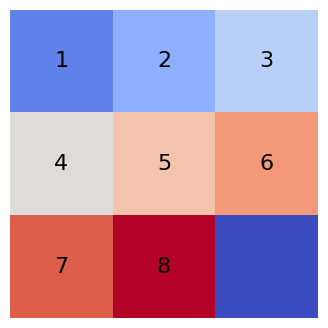

In [4]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class PuzzleState:
    def __init__(self, board, parent=None, move=None, depth=0):
        self.board = board
        self.parent = parent
        self.move = move
        self.depth = depth
        self.priority = 0

    def __lt__(self, other):
        return self.priority < other.priority

    def get_possible_moves(self):
        moves = []
        zero_pos = np.argwhere(self.board == 0)[0]
        directions = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

        for move, (dx, dy) in directions.items():
            new_pos = zero_pos + np.array([dx, dy])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
                new_board = self.board.copy()
                new_board[zero_pos[0], zero_pos[1]], new_board[new_pos[0], new_pos[1]] = (
                    new_board[new_pos[0], new_pos[1]], new_board[zero_pos[0], zero_pos[1]])
                moves.append(PuzzleState(new_board, self, move, self.depth + 1))
        return moves

def heuristic_misplaced_tiles(state, goal):
    return np.sum(state.board != goal) - 1  # Ignore the blank tile

def a_star(start, goal, heuristic):
    open_list = []
    closed_set = set()
    heapq.heappush(open_list, (0, start))

    while open_list:
        _, current = heapq.heappop(open_list)
        if np.array_equal(current.board, goal):
            return current  # Goal reached
        closed_set.add(current.board.tobytes())

        for neighbor in current.get_possible_moves():
            if neighbor.board.tobytes() in closed_set:
                continue
            neighbor.priority = neighbor.depth + heuristic(neighbor, goal)
            heapq.heappush(open_list, (neighbor.priority, neighbor))

    return None

def extract_solution(state):
    path = []
    while state:
        path.append(state.board)
        state = state.parent
    path.reverse()
    return path

def visualize_solution(path):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.axis('off')

    def update(frame):
        ax.clear()
        ax.axis('off')
        board = path[frame]
        ax.matshow(board, cmap='coolwarm')
        for (x, y), val in np.ndenumerate(board):
            ax.text(y, x, str(val) if val != 0 else '', ha='center', va='center', fontsize=16, color='black')

    ani = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return HTML(ani.to_jshtml())

# Initial and goal state
start_state = PuzzleState(np.array([
    [1, 2, 3],
    [4, 0, 5],
    [6, 7, 8]
]))
goal_state = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])

# Solve the puzzle
solution = a_star(start_state, goal_state, heuristic_misplaced_tiles)
if solution:
    path = extract_solution(solution)
    display(visualize_solution(path))
else:
    print("No solution found.")
